In [1]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import urllib

In [2]:
train_df = pd.read_csv('solar_panels.csv').drop('Unnamed: 0', axis=1)

In [3]:
train_df['date'] = train_df['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [4]:
train_df.head()

,date,solar_produced_per_day,daylight,daylight_avg_temp,avg_cloudcover,avg_direct_radiation,weather,max_wind_speed,max_temp
0,2011-10-27,10.1,604.0,14.7,45.5,75.0,3,17.1,16.1
1,2011-10-28,10.0,600.0,16.0,16.5,143.0,3,9.1,17.4
2,2011-10-29,9.4,597.0,15.3,75.0,25.0,51,11.3,17.4
3,2011-10-30,4.6,593.0,15.1,91.5,49.0,3,15.3,16.2
4,2011-10-31,3.8,589.0,15.0,60.5,47.5,3,12.3,15.9


In [5]:
train_df['date']

0      2011-10-27
1      2011-10-28
2      2011-10-29
3      2011-10-30
4      2011-10-31
          ...    
3298   2020-11-06
3299   2020-11-07
3300   2020-11-08
3301   2020-11-09
3302   2020-11-10
Name: date, Length: 3303, dtype: datetime64[ns]

In [6]:
import matplotlib.pyplot as plt


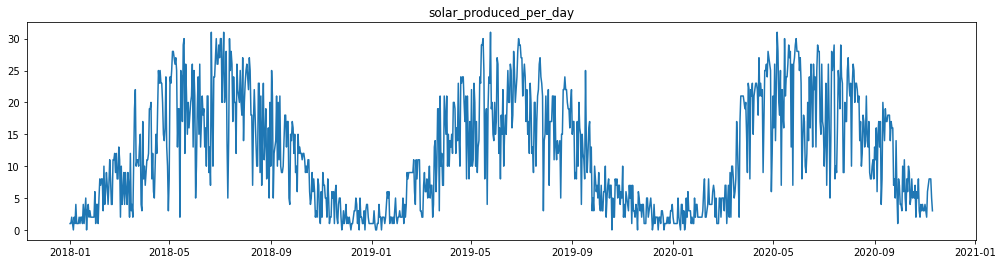

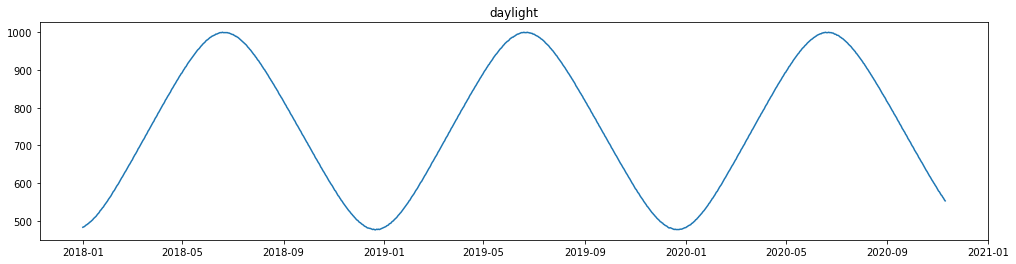

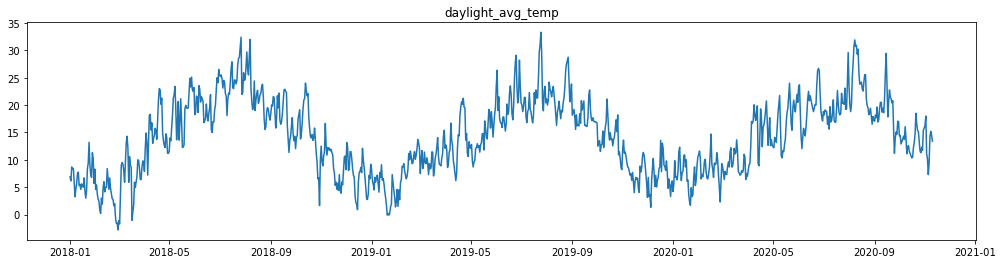

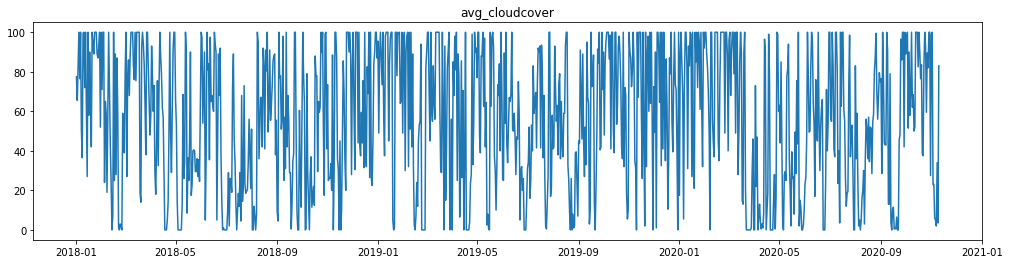

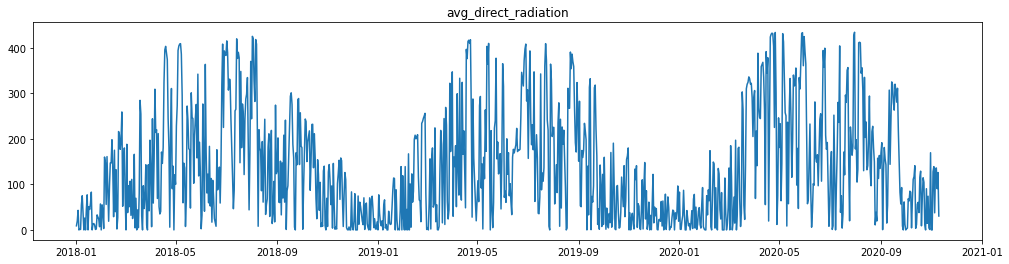

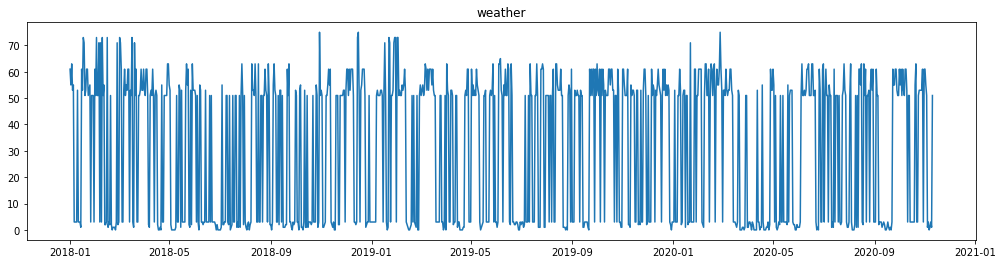

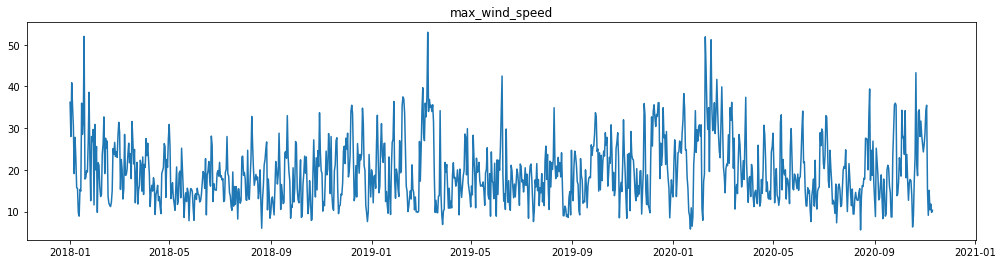

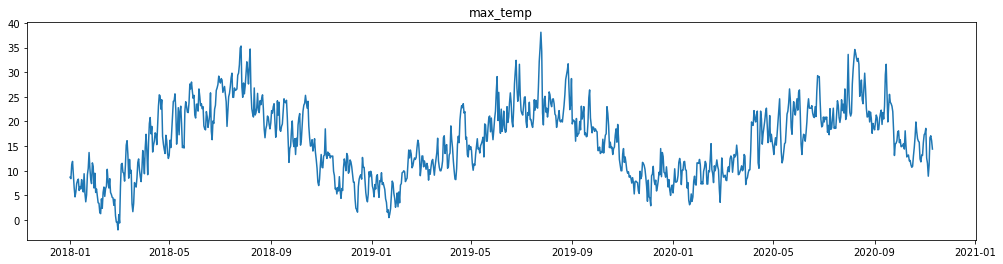

In [7]:
# solar_produced_per_day
columns = list(train_df.columns)
columns.remove('date')
plot_year= train_df[(train_df['date'] >= datetime.strptime('2018-01-01','%Y-%m-%d')) & (train_df['date'] <= datetime.strptime('2020-11-10','%Y-%m-%d')) ]
for column in columns:
    
    plt.figure().set_figwidth(17)
    plt.title(column)
    plt.plot(plot_year['date'].to_numpy(),plot_year[column].to_numpy())
    plt.show()

In [18]:
test_df = plot_year
test_df['month'] = test_df['date'].apply(lambda x: int(x.strftime('%m').replace('0', '')))
test_df = test_df.drop('date', axis=1)
test_df.head()

,solar_produced_per_day,daylight,daylight_avg_temp,avg_cloudcover,avg_direct_radiation,weather,max_wind_speed,max_temp,month
2258,1.0,483.0,6.90,77.5,9.0,61,36.2,8.7,1
2259,1.0,484.0,6.15,65.5,19.5,55,28.0,8.4,1
2260,2.0,485.0,8.70,83.5,43.0,63,40.9,11.2,1
2261,1.0,487.0,8.40,100.0,0.0,53,35.2,11.9,1
2262,0.0,489.0,8.40,76.5,1.5,55,30.5,9.3,1


In [9]:
train_df = train_df[(train_df['date'] < datetime.strptime('2020-01-01','%Y-%m-%d'))]
train_df['month'] = train_df['date'].apply(lambda x: int(x.strftime('%m').replace('0', '')))
train_df = train_df.drop('date', axis=1)
train_df.head()

,solar_produced_per_day,daylight,daylight_avg_temp,avg_cloudcover,avg_direct_radiation,weather,max_wind_speed,max_temp,month
0,10.1,604.0,14.7,45.5,75.0,3,17.1,16.1,1
1,10.0,600.0,16.0,16.5,143.0,3,9.1,17.4,1
2,9.4,597.0,15.3,75.0,25.0,51,11.3,17.4,1
3,4.6,593.0,15.1,91.5,49.0,3,15.3,16.2,1
4,3.8,589.0,15.0,60.5,47.5,3,12.3,15.9,1


In [86]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, MultiTaskLasso, Lasso, ElasticNet, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, VotingRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold
import xgboost as xgb
import math
# train_df['date'] =  train_df['date'].apply(lambda x: int(x.strftime('%m').replace('0', '')))

In [19]:
X=train_df.drop('solar_produced_per_day', axis=1)
y = train_df['solar_produced_per_day']

X_valid =test_df.drop('solar_produced_per_day', axis=1)
y_valid = test_df['solar_produced_per_day']

In [13]:
import random

Linear Regression isn't good idea here beacause we have some non-linear features such as month.


In [87]:
kf = KFold(shuffle=True, random_state=1)

In [101]:
s = make_pipeline(StandardScaler(),svm.SVR(kernel='rbf', gamma='scale', C=0.824302))
bgs = BaggingRegressor(s, random_state=1)
rf =make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=90, max_depth=6, random_state=41))
el = ElasticNet(alpha=0.001225, random_state=1)
xgb_model =  xgb.XGBRegressor(n_estimators=800, max_depth=2, learning_rate=0.04)

estimators = [
    ('rf', rf),
    ('xgb', xgb_model),
    ('svr', s)
]
voting = VotingRegressor(estimators=estimators, weights=[7,9, 4])
model = make_pipeline(StandardScaler(), voting)
model.fit(X, y)


predictions = model.predict(X_test)
score = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
#MSE
print(score)
print(mean_absolute_error(y_test, predictions))

[-3.27332605 -3.14302472 -3.2267162  -3.34102361 -3.28571067]
2.973098855867958


In [83]:
print(predictions)
print(y_test)

[ 5.48969003  3.29551057  2.84121398 12.18189089  5.97791079  9.66317862
  2.90754528 17.56549094  3.45164765 24.69286096 10.9181675  12.82407634
 15.45664061  9.06029896  3.58826124  2.23982525  3.91842394  6.50619694
  2.10107563  3.39787017  6.80539697 15.63172827 13.22014284  1.74872111
  5.99098454  1.96057354  4.15738761  3.54855118 21.62461621  3.53142969
 18.12357058 14.252386    5.72758434 19.71575846 16.52076063  4.01993258
  4.98419215  3.12663923 13.35136091 12.50552876 10.56511373 10.22169979
  1.59720195 16.9767948  19.53538124  6.53962865  3.25594336  6.75271065
 18.03745422  7.82736901  3.19113399 21.49562279 18.5140832   1.85227164
 10.06558902 16.60486257 17.70609179  2.31623432  5.24859135  5.65700163
  1.33030667  4.93626585  2.20694772  2.4002557   5.3391096   2.41618051
 13.21374724  2.07829965 14.44591439 22.58755899 11.80422687 15.80106282
  2.00633683 12.89653825 14.23572469  8.73410473  2.64837783  5.1078594
 16.40641325 17.54932718  6.97697483 11.80522461  5.